In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
#%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

#Missing values
import missingno as mno

from sklearn import linear_model

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

import statsmodels.api as sm

In [388]:
#----------Find what the charecter encoding-----
import chardet

file="C:/Hymaa/Data Science/Project 1/Data - Copy.csv"
with open(file,'rb') as rawdata:
    result=chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [389]:
#Charecter encoding done in ascii

df = pd.read_csv(file,encoding='ISO8859-1',low_memory=False,sep=',')
df.columns=df.columns.str.rstrip() #Remove white spaces in column names
df.columns=df.columns.str.lstrip()
print(df.head())

#Data Types
display(df.info())

# Statistics for each column
display(df.describe())

file="C:/Hymaa/Data Science/Project 1/test.csv"
df_test = pd.read_csv(file,encoding='ISO8859-1',low_memory=False,sep=',')
df_test.columns=df_test.columns.str.rstrip() #Remove white spaces in column names
df_test.columns=df_test.columns.str.lstrip()
df_test

   member_id  loan_amnt      terms    batch_ID  Rate_of_intrst grade  \
0   58189336      14350  36 months                       19.19     E   
1   70011223       4800  36 months  BAT1586599           10.99     B   
2   70255675      10000  36 months  BAT1586599            7.26     A   
3    1893936      15000  36 months  BAT4808022           19.72     D   
4    7652106      16000  36 months  BAT2833642           10.64     B   

  sub_grade                    Emp_designation Experience home_ownership  \
0        E3                              clerk    9 years            OWN   
1        B4         Human Resources Specialist   < 1 year       MORTGAGE   
2        A4                             Driver    2 years            OWN   
3        D5  Us office of Personnel Management  10+ years           RENT   
4        B2        LAUSD-HOLLYWOOD HIGH SCHOOL  10+ years           RENT   

   annual_inc verification_status             purpose State  \
0     28700.0     Source Verified  debt_consoli

None

,member_id,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,8.873790e+05,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05
mean,3.500182e+07,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,25.268026,1754.804327,0.396692,45.919243,4.880757,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05
std,2.411335e+07,8435.455601,4.381867,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,11.840561,2095.356099,4.087825,409.693874,63.125281,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05
min,7.047300e+04,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.087713e+07,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,17.000000,441.460000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04
50%,3.709528e+07,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,24.000000,1073.280000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04
75%,5.847135e+07,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.082900e+04,32.000000,2238.265000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05
max,7.354484e+07,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,86.000000,2.904836e+06,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06


,S.No,member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total_credits,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,1,66493178,21000,36 months,BAT2252229,9.99,B,B3,Account Manager,2 years,MORTGAGE,110000.0,Not Verified,credit_card,WI,15.51,1.0,0.0,0.0,NaN,16.0,0.0,29.0,w,500.23,0.000000,0.00,0.0000,0.0,40.0,INDIVIDUAL,NaN,13th week,1.0,0.0,368784.0
1,2,1690317,10800,36 months,BAT3058155,14.09,B,B5,NJ Charter Schools Assoc.,2 years,MORTGAGE,86000.0,Not Verified,credit_card,NJ,14.04,2.0,1.0,11.0,NaN,14.0,0.0,36.0,f,932.37,0.000000,0.00,0.0000,0.0,NaN,INDIVIDUAL,NaN,35th week,0.0,NaN,NaN
2,3,71246674,17450,60 months,BAT2803411,14.48,C,C5,Sr Trade Marketing Manager,3 years,OWN,82000.0,Not Verified,credit_card,MO,31.90,0.0,1.0,NaN,NaN,7.0,0.0,20.0,w,196.52,0.000000,0.00,0.0000,0.0,NaN,INDIVIDUAL,NaN,4th week,0.0,0.0,428523.0
3,4,12588228,15450,36 months,BAT224923,14.98,C,C3,technician,10+ years,RENT,46000.0,Verified,debt_consolidation,CA,30.01,0.0,0.0,NaN,NaN,9.0,0.0,15.0,w,3253.31,0.000000,0.00,0.0000,0.0,NaN,INDIVIDUAL,NaN,100th week,0.0,0.0,47212.0
4,5,41219869,3500,36 months,BAT4694572,9.49,B,B2,asst. manager,10+ years,OWN,65000.0,Source Verified,home_improvement,NC,3.80,1.0,0.0,15.0,NaN,8.0,0.0,17.0,f,285.05,0.000000,0.00,0.0000,0.0,50.0,INDIVIDUAL,NaN,52th week,0.0,0.0,24026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266209,266210,924365,8000,36 months,BAT20678,15.28,D,D3,West Islip Public Schools,7 years,RENT,70000.0,Source Verified,debt_consolidation,NY,11.91,1.0,2.0,3.0,NaN,7.0,0.0,29.0,f,576.62,29.948287,973.59,175.2462,0.0,NaN,INDIVIDUAL,NaN,31th week,0.0,NaN,NaN
266210,266211,69272307,15000,36 months,BAT1586599,10.99,B,B4,Behavior Support Program Director,1 year,MORTGAGE,43000.0,Source Verified,debt_consolidation,PA,11.28,0.0,0.0,37.0,NaN,5.0,0.0,27.0,w,253.19,0.000000,0.00,0.0000,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,248733.0
266211,266212,46537839,26800,36 months,BAT4136152,13.33,C,C3,Billing Coordinator,10+ years,MORTGAGE,67000.0,Source Verified,credit_card,GA,14.28,0.0,0.0,25.0,77.0,8.0,2.0,28.0,w,2409.29,0.000000,0.00,0.0000,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,60.0,165488.0
266212,266213,14469700,20000,36 months,BAT3016651,6.62,A,A2,Owner/Operator,10+ years,MORTGAGE,60000.0,Verified,debt_consolidation,GA,23.64,0.0,1.0,NaN,NaN,9.0,0.0,24.0,f,1746.56,0.000000,0.00,0.0000,0.0,NaN,INDIVIDUAL,NaN,91th week,0.0,0.0,156518.0


In [390]:
#Drop unqiue ID features
df=df.drop(columns=['member_id','batch_ID'],axis=1)

# --------------------Rename the reveloving balance ------------------------------------------
df = df.rename(columns = {'total revol_bal': 'total_revol_bal'})

# Statistics for each column
desc_temp=df.describe()
display(desc_temp)

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total_revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05
mean,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,25.268026,1754.804327,0.396692,45.919243,4.880757,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05
std,8435.455601,4.381867,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,11.840561,2095.356099,4.087825,409.693874,63.125281,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05
min,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,17.000000,441.460000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04
50%,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,24.000000,1073.280000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04
75%,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.082900e+04,32.000000,2238.265000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05
max,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,86.000000,2.904836e+06,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06


In [391]:
df_test=df_test.drop(columns=['member_id','batch_ID'],axis=1)

# --------------------Rename the reveloving balance ------------------------------------------
df_test = df_test.rename(columns = {'total revol_bal': 'total_revol_bal'})

# Statistics for each column
desc_temp=df_test.describe()
display(desc_temp)

,S.No,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,266214.000000,266214.000000,266214.000000,2.662140e+05,266214.000000,266205.000000,266205.000000,129919.000000,41214.000000,266205.000000,266205.000000,266205.000000,266214.000000,266214.000000,266214.000000,266214.000000,266171.000000,66784.000000,266205.000000,2.452090e+05,2.452090e+05
mean,133107.500000,14767.282337,13.255772,7.491681e+04,18.197109,0.314671,0.692797,34.119952,69.980638,11.541132,0.196007,25.253049,1759.570574,0.402873,45.751086,4.978524,0.014179,44.153091,0.004925,2.556516e+02,1.392703e+05
std,76849.506618,8447.119235,4.379555,6.131229e+04,28.593752,0.866799,0.991073,21.874732,28.069524,5.315467,0.588295,11.836100,2104.219629,4.077720,415.692004,67.451019,0.136378,22.290710,0.080907,1.858033e+04,1.534451e+05
min,1.000000,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,66554.250000,8000.000000,9.990000,4.500000e+04,11.890000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,17.000000,442.640000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.972000e+04
50%,133107.500000,13000.000000,12.990000,6.470000e+04,17.670000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,24.000000,1076.090000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.062500e+04
75%,199660.750000,20000.000000,16.200000,9.000000e+04,23.940000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,32.000000,2243.310000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.084040e+05
max,266214.000000,35000.000000,28.990000,8.706582e+06,9999.000000,27.000000,27.000000,180.000000,120.000000,90.000000,63.000000,169.000000,23062.450000,286.747566,31900.520000,7002.190000,16.000000,180.000000,14.000000,9.152545e+06,8.000078e+06


In [392]:
#Drop below features as 25th to 75% percetile has zero values only.
#i.e., except rest all numbers fall under outliers and there is no use if tyy to apply any outlier handling technique as 75 to 80% data has zero

features_with_Most_zeros=['pub_rec', 'delinq_2yrs','total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt']
df=df.drop(columns=features_with_Most_zeros,axis=1)
display(df.head())
display(df.shape)

,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,total_revol_bal,total_credits,initial_list_status,total_rec_int,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,tot_curr_bal
0,14350,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,debt_consolidation,FL,33.88,1.0,50.0,75.0,14.0,22515.0,28.0,f,1173.84,74.0,INDIVIDUAL,NaN,26th week,28699.0
1,4800,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,MD,3.64,1.0,NaN,NaN,6.0,7624.0,13.0,w,83.95,NaN,INDIVIDUAL,NaN,9th week,9974.0
2,10000,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,debt_consolidation,OH,18.42,0.0,NaN,NaN,5.0,10877.0,19.0,w,56.47,NaN,INDIVIDUAL,NaN,9th week,38295.0
3,15000,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,debt_consolidation,VA,14.97,2.0,46.0,NaN,10.0,13712.0,21.0,f,4858.62,NaN,INDIVIDUAL,NaN,135th week,55564.0
4,16000,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,credit_card,CA,20.16,0.0,NaN,NaN,11.0,35835.0,27.0,w,2296.41,NaN,INDIVIDUAL,NaN,96th week,47159.0


(887379, 26)

In [393]:
#Drop below features as 25th to 75% percetile has zero values only.
#i.e., except rest all numbers fall under outliers and there is no use if tyy to apply any outlier handling technique as 75 to 80% data has zero

features_with_Most_zeros=['pub_rec', 'delinq_2yrs','total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt']
df_test=df_test.drop(columns=features_with_Most_zeros,axis=1)
display(df_test.head())
display(df_test.shape)

,S.No,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,total_credits,initial_list_status,total_rec_int,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,tot_curr_bal
0,1,21000,36 months,9.99,B,B3,Account Manager,2 years,MORTGAGE,110000.0,Not Verified,credit_card,WI,15.51,0.0,0.0,NaN,16.0,29.0,w,500.23,40.0,INDIVIDUAL,NaN,13th week,368784.0
1,2,10800,36 months,14.09,B,B5,NJ Charter Schools Assoc.,2 years,MORTGAGE,86000.0,Not Verified,credit_card,NJ,14.04,1.0,11.0,NaN,14.0,36.0,f,932.37,NaN,INDIVIDUAL,NaN,35th week,NaN
2,3,17450,60 months,14.48,C,C5,Sr Trade Marketing Manager,3 years,OWN,82000.0,Not Verified,credit_card,MO,31.90,1.0,NaN,NaN,7.0,20.0,w,196.52,NaN,INDIVIDUAL,NaN,4th week,428523.0
3,4,15450,36 months,14.98,C,C3,technician,10+ years,RENT,46000.0,Verified,debt_consolidation,CA,30.01,0.0,NaN,NaN,9.0,15.0,w,3253.31,NaN,INDIVIDUAL,NaN,100th week,47212.0
4,5,3500,36 months,9.49,B,B2,asst. manager,10+ years,OWN,65000.0,Source Verified,home_improvement,NC,3.80,0.0,15.0,NaN,8.0,17.0,f,285.05,50.0,INDIVIDUAL,NaN,52th week,24026.0


(266214, 26)

In [394]:
#---------Data Munging--------------------------
# Missing Values
# Rename columns
# Data Transformation
# Coding,en-coding,decoding
# Outlier
# Anamolies

display(df.isnull().head())

#Missing Values
display(df.isnull().sum())

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,total_revol_bal,total_credits,initial_list_status,total_rec_int,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,tot_curr_bal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False


loan_amnt                           0
terms                               0
Rate_of_intrst                      0
grade                               0
sub_grade                           0
Emp_designation                 51462
Experience                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
State                               0
debt_income_ratio                   0
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
numb_credit                        29
total_revol_bal                     0
total_credits                      29
initial_list_status                 0
total_rec_int                       0
mths_since_last_major_derog    665676
application_type                    0
verification_status_joint      886868
last_week_pay                       0
tot_curr_bal                    70276
dtype: int64

Your selected dataframe has 26 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
verification_status_joint,886868,99.9
mths_since_last_record,750326,84.6
mths_since_last_major_derog,665676,75.0
mths_since_last_delinq,454312,51.2
tot_curr_bal,70276,7.9
Emp_designation,51462,5.8
Experience,44825,5.1
inq_last_6mths,29,0.0
numb_credit,29,0.0
total_credits,29,0.0


In [395]:
#---------------- Get the columns with > 50% missing-------------
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 26 columns.
There are 11 columns that have missing values.
We will remove 4 columns.


In [396]:
#---------------- Get the columns with > 50% missing-------------
missing_df = missing_values_table(df_test);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 26 columns.
There are 10 columns that have missing values.
We will remove 4 columns.


In [397]:
# ---------Drop the columns----------------
df = df.drop(columns = list(missing_columns))
display(df.head())
display(df.shape)

,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,inq_last_6mths,numb_credit,total_revol_bal,total_credits,initial_list_status,total_rec_int,application_type,last_week_pay,tot_curr_bal
0,14350,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,debt_consolidation,FL,33.88,1.0,14.0,22515.0,28.0,f,1173.84,INDIVIDUAL,26th week,28699.0
1,4800,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,MD,3.64,1.0,6.0,7624.0,13.0,w,83.95,INDIVIDUAL,9th week,9974.0
2,10000,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,debt_consolidation,OH,18.42,0.0,5.0,10877.0,19.0,w,56.47,INDIVIDUAL,9th week,38295.0
3,15000,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,debt_consolidation,VA,14.97,2.0,10.0,13712.0,21.0,f,4858.62,INDIVIDUAL,135th week,55564.0
4,16000,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,credit_card,CA,20.16,0.0,11.0,35835.0,27.0,w,2296.41,INDIVIDUAL,96th week,47159.0


(887379, 22)

In [398]:
# ---------Drop the columns----------------
df_test = df_test.drop(columns = list(missing_columns))
display(df_test.head())
display(df_test.shape)

,S.No,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,inq_last_6mths,numb_credit,total_credits,initial_list_status,total_rec_int,application_type,last_week_pay,tot_curr_bal
0,1,21000,36 months,9.99,B,B3,Account Manager,2 years,MORTGAGE,110000.0,Not Verified,credit_card,WI,15.51,0.0,16.0,29.0,w,500.23,INDIVIDUAL,13th week,368784.0
1,2,10800,36 months,14.09,B,B5,NJ Charter Schools Assoc.,2 years,MORTGAGE,86000.0,Not Verified,credit_card,NJ,14.04,1.0,14.0,36.0,f,932.37,INDIVIDUAL,35th week,NaN
2,3,17450,60 months,14.48,C,C5,Sr Trade Marketing Manager,3 years,OWN,82000.0,Not Verified,credit_card,MO,31.90,1.0,7.0,20.0,w,196.52,INDIVIDUAL,4th week,428523.0
3,4,15450,36 months,14.98,C,C3,technician,10+ years,RENT,46000.0,Verified,debt_consolidation,CA,30.01,0.0,9.0,15.0,w,3253.31,INDIVIDUAL,100th week,47212.0
4,5,3500,36 months,9.49,B,B2,asst. manager,10+ years,OWN,65000.0,Source Verified,home_improvement,NC,3.80,0.0,8.0,17.0,f,285.05,INDIVIDUAL,52th week,24026.0


(266214, 22)

In [399]:
df_test=df_test.drop('S.No',axis=1)
df_test

,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,inq_last_6mths,numb_credit,total_credits,initial_list_status,total_rec_int,application_type,last_week_pay,tot_curr_bal
0,21000,36 months,9.99,B,B3,Account Manager,2 years,MORTGAGE,110000.0,Not Verified,credit_card,WI,15.51,0.0,16.0,29.0,w,500.23,INDIVIDUAL,13th week,368784.0
1,10800,36 months,14.09,B,B5,NJ Charter Schools Assoc.,2 years,MORTGAGE,86000.0,Not Verified,credit_card,NJ,14.04,1.0,14.0,36.0,f,932.37,INDIVIDUAL,35th week,NaN
2,17450,60 months,14.48,C,C5,Sr Trade Marketing Manager,3 years,OWN,82000.0,Not Verified,credit_card,MO,31.90,1.0,7.0,20.0,w,196.52,INDIVIDUAL,4th week,428523.0
3,15450,36 months,14.98,C,C3,technician,10+ years,RENT,46000.0,Verified,debt_consolidation,CA,30.01,0.0,9.0,15.0,w,3253.31,INDIVIDUAL,100th week,47212.0
4,3500,36 months,9.49,B,B2,asst. manager,10+ years,OWN,65000.0,Source Verified,home_improvement,NC,3.80,0.0,8.0,17.0,f,285.05,INDIVIDUAL,52th week,24026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266209,8000,36 months,15.28,D,D3,West Islip Public Schools,7 years,RENT,70000.0,Source Verified,debt_consolidation,NY,11.91,2.0,7.0,29.0,f,576.62,INDIVIDUAL,31th week,NaN
266210,15000,36 months,10.99,B,B4,Behavior Support Program Director,1 year,MORTGAGE,43000.0,Source Verified,debt_consolidation,PA,11.28,0.0,5.0,27.0,w,253.19,INDIVIDUAL,9th week,248733.0
266211,26800,36 months,13.33,C,C3,Billing Coordinator,10+ years,MORTGAGE,67000.0,Source Verified,credit_card,GA,14.28,0.0,8.0,28.0,w,2409.29,INDIVIDUAL,39th week,165488.0
266212,20000,36 months,6.62,A,A2,Owner/Operator,10+ years,MORTGAGE,60000.0,Verified,debt_consolidation,GA,23.64,1.0,9.0,24.0,f,1746.56,INDIVIDUAL,91th week,156518.0


In [400]:
#Dropping 29 records which is having blank data for most of the features
df=df[df['inq_last_6mths'].isnull() == False]
final_missing_columns=missing_values_table(df)
print(final_missing_columns.index)

display(missing_values_table(df))

Your selected dataframe has 22 columns.
There are 3 columns that have missing values.
Index(['tot_curr_bal', 'Emp_designation', 'Experience'], dtype='object')
Your selected dataframe has 22 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
tot_curr_bal,70247,7.9
Emp_designation,51450,5.8
Experience,44825,5.1


In [401]:
#Dropping 29 records which is having blank data for most of the features
#df_test=df_test[df_test['inq_last_6mths'].isnull() == False]
final_missing_columns=missing_values_table(df_test)
print(final_missing_columns.index)

display(missing_values_table(df_test))

Your selected dataframe has 21 columns.
There are 6 columns that have missing values.
Index(['tot_curr_bal', 'Emp_designation', 'Experience', 'inq_last_6mths',
       'numb_credit', 'total_credits'],
      dtype='object')
Your selected dataframe has 21 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
tot_curr_bal,21005,7.9
Emp_designation,15480,5.8
Experience,13491,5.1
inq_last_6mths,9,0.0
numb_credit,9,0.0
total_credits,9,0.0


In [402]:
X=df.drop('total_revol_bal',axis=1)
y=df['total_revol_bal'].copy()
display(df.head())
display(X.head())

,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,inq_last_6mths,numb_credit,total_revol_bal,total_credits,initial_list_status,total_rec_int,application_type,last_week_pay,tot_curr_bal
0,14350,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,debt_consolidation,FL,33.88,1.0,14.0,22515.0,28.0,f,1173.84,INDIVIDUAL,26th week,28699.0
1,4800,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,MD,3.64,1.0,6.0,7624.0,13.0,w,83.95,INDIVIDUAL,9th week,9974.0
2,10000,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,debt_consolidation,OH,18.42,0.0,5.0,10877.0,19.0,w,56.47,INDIVIDUAL,9th week,38295.0
3,15000,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,debt_consolidation,VA,14.97,2.0,10.0,13712.0,21.0,f,4858.62,INDIVIDUAL,135th week,55564.0
4,16000,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,credit_card,CA,20.16,0.0,11.0,35835.0,27.0,w,2296.41,INDIVIDUAL,96th week,47159.0


,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,inq_last_6mths,numb_credit,total_credits,initial_list_status,total_rec_int,application_type,last_week_pay,tot_curr_bal
0,14350,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,debt_consolidation,FL,33.88,1.0,14.0,28.0,f,1173.84,INDIVIDUAL,26th week,28699.0
1,4800,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,MD,3.64,1.0,6.0,13.0,w,83.95,INDIVIDUAL,9th week,9974.0
2,10000,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,debt_consolidation,OH,18.42,0.0,5.0,19.0,w,56.47,INDIVIDUAL,9th week,38295.0
3,15000,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,debt_consolidation,VA,14.97,2.0,10.0,21.0,f,4858.62,INDIVIDUAL,135th week,55564.0
4,16000,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,credit_card,CA,20.16,0.0,11.0,27.0,w,2296.41,INDIVIDUAL,96th week,47159.0


In [403]:
#80% Data Split - train(70%) and Test(30%)
XX_train, XX_test, yy_train, yy_test = train_test_split(X,y,test_size=0.3,random_state=27)
display(XX_train.shape)
display(XX_test.shape)
display(yy_train.shape)
display(yy_test.shape)

(621145, 21)

(266205, 21)

(621145,)

(266205,)

In [404]:
# --------------------Create List for each type ------------------------------------------
def Creat_List_For_Each_Type(df,num_cols):
    int_vars=[]
    categorical_vars=[]
    continuous_vars=[]

    for i in df.columns:
        if num_cols.columns.__contains__(i):
           if num_cols[i]['25%']+num_cols[i]['50%']+num_cols[i]['75%'] == 0 :
               int_vars.append(i)
           else:
               continuous_vars.append(i)
        else:
            categorical_vars.append(i)
    return int_vars,categorical_vars,continuous_vars
      
int_vars,categorical_vars,continuous_vars=Creat_List_For_Each_Type(XX_train,desc_temp)
print("Categorical Variables: "+','.join(categorical_vars)+"\n\nInteger Variables: "+','.join(int_vars)+"\n\nContinuous Variables: "+','.join(continuous_vars))


Categorical Variables: terms,grade,sub_grade,Emp_designation,Experience,home_ownership,verification_status,purpose,State,initial_list_status,application_type,last_week_pay

Integer Variables: 

Continuous Variables: loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,inq_last_6mths,numb_credit,total_credits,total_rec_int,tot_curr_bal


In [405]:
#Dropping below features as per the previous analysis

Keep_cols=['tot_curr_bal','annual_inc','debt_income_ratio','numb_credit','loan_amnt','total_credits','home_ownership','Emp_designation','total_rec_int','verification_status','initial_list_status','Rate_of_intrst','Experience','purpose']
len(Keep_cols)

XX_train=XX_train[Keep_cols]
len(XX_train.columns)

display(len(XX_train))
desc_temp=XX_train.describe()
int_vars,categorical_vars,continuous_vars=Creat_List_For_Each_Type(XX_train,desc_temp)
print("Categorical Variables: "+','.join(categorical_vars)+"\n\nInteger Variables: "+','.join(int_vars)+"\n\nContinuous Variables: "+','.join(continuous_vars))

621145

Categorical Variables: home_ownership,Emp_designation,verification_status,initial_list_status,Experience,purpose

Integer Variables: 

Continuous Variables: tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst


In [406]:
#Dropping below features as per the previous analysis

Keep_cols=['tot_curr_bal','annual_inc','debt_income_ratio','numb_credit','loan_amnt','total_credits','home_ownership','Emp_designation','total_rec_int','verification_status','initial_list_status','Rate_of_intrst','Experience','purpose']
len(Keep_cols)

XX_test=XX_test[Keep_cols]
len(XX_test.columns)

len(XX_test)


266205

In [407]:
#Dropping below features as per the previous analysis

Keep_cols=['tot_curr_bal','annual_inc','debt_income_ratio','numb_credit','loan_amnt','total_credits','home_ownership','Emp_designation','total_rec_int','verification_status','initial_list_status','Rate_of_intrst','Experience','purpose']
len(Keep_cols)

df_test=df_test[Keep_cols]
len(df_test.columns)

len(df_test)


266214

In [408]:

def RemoveOutliers(df,var_name):
    # Calculate first and third quartile
    first_quartile = df[var_name].describe()['25%']
    third_quartile = df[var_name].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile
    print(iqr)
    # Remove outliers
    df=df[(df[var_name] >= (first_quartile - (1.15*iqr))) &
                (df[var_name] <= (third_quartile + (1.15*iqr)))]
    return df
    
def ImputeOutliers(df_t,var_name):
    q1 = df_t[var_name].quantile(0.25) #first quartile value
    q3 = df_t[var_name].quantile(0.75) # third quartile value
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr #acceptable range
    
    display(var_name)
    df_t[var_name]=df_t.query(str(var_name)+' >= @low')[var_name]
    df_t[var_name].fillna(value=low, inplace=True)
    display("Low - "+str(low))
    
    df_t[var_name]=df_t.query(str(var_name)+' <= @high')[var_name]
    df_t[var_name].fillna(value=high, inplace=True)
    display("High - "+str(high))
    
    #display(var_name)
    #df_t[var_name]=df_t.query(str(var_name)+' >= @low and '+str(var_name)+' <= @high')[var_name]
    #df_t[var_name].fillna(value=df_t[var_name].median(), inplace=True)
    #display("Median - "+str(df_t[var_name].median()))
    
    #display(var_name)
    
    #df_t[var_name]=df_t.query(str(var_name)+' >= @low and '+str(var_name)+' <= @high')[var_name]
    #print("Len - "+str(len(df_t)))
    #print("Len NUll - "+str(df_t[var_name].isnull().sum()))
    #display("Mean - "+str(df_t[var_name].dropna().mean()))
    #df_t[var_name].fillna(value=df_t[var_name].mean(), inplace=True)
    #print("Len - "+str(len(df_t)))
    #print("Len NUll - "+str(df_t[var_name].isnull().sum()))
    #display("Mean - "+str(df_t[var_name].dropna().mean()))
    
    #df_include = df_t.loc[(df_t[var_name] >= low) & \
    #                            (df_t[var_name] <= high)] # meeting the acceptable range
    #df_exclude = df_t.loc[(df_t[var_name] < low) | \
    #                           (df_t[var_name] > high)] #not mee
    #print(df_include.shape)
    #print(df_exclude.shape)
    
    #var_name_mean=int(df_include[var_name].mean()) #finding the mean of the acceptable range
    #print(var_name_mean)
    
    #imputing outlier values with mean value
    #df_exclude.var_name=var_name_mean
    
    #getting back the original shape of df
    #df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get the original shape
    #print(df_rev.shape)
    #print(df_rev)
    return df_t

def outlier(df_t,var_name):
    from numpy import percentile
    # seed the random number generator    
    # generate univariate observations
    # calculate interquartile range
    q1 = df_t[var_name].quantile(0.25) #first quartile value
    q3 = df_t[var_name].quantile(0.75) # third quartile value
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr #acceptable range
    print(i)
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    # identify outliers
    outliers = [x for x in df_t[var_name] if x < low or x > high]
    #print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df_t[var_name] if x >= low and x <= high]
    #print('Non-outlier observations: %d' % len(outliers_removed))
    
    return [len(outliers),len(outliers_removed),high]

In [411]:
final_missing_columns=missing_values_table(XX_train)
print(final_missing_columns.index)

display(missing_values_table(XX_train))

final_missing_columns1=missing_values_table(XX_test)
print(final_missing_columns.index)

display(missing_values_table(XX_test))

final_missing_columns1=missing_values_table(df_test)
print(final_missing_columns.index)

display(missing_values_table(df_test))

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.
Index([], dtype='object')
Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Your selected dataframe has 14 columns.
There are 3 columns that have missing values.
Index([], dtype='object')
Your selected dataframe has 14 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
tot_curr_bal,21206,8.0
Emp_designation,15308,5.8
Experience,13367,5.0


Your selected dataframe has 14 columns.
There are 5 columns that have missing values.
Index([], dtype='object')
Your selected dataframe has 14 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
tot_curr_bal,21005,7.9
Emp_designation,15480,5.8
Experience,13491,5.1
numb_credit,9,0.0
total_credits,9,0.0


In [412]:
#Missing Values Imputation
XX_train['Emp_designation'].fillna(value=XX_train['Emp_designation'].value_counts().index[0], inplace=True)
XX_train['Experience'].fillna(value=XX_train['Experience'].value_counts().index[0], inplace=True)
XX_train['tot_curr_bal'].fillna(value=XX_train['tot_curr_bal'].median(), inplace=True)

final_missing_columns=missing_values_table(XX_train)
print(final_missing_columns.index)

display(missing_values_table(XX_train))

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.
Index([], dtype='object')
Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [414]:
#Missing Values Imputation
XX_test['Emp_designation'].fillna(value=XX_test['Emp_designation'].value_counts().index[0], inplace=True)
XX_test['Experience'].fillna(value=XX_test['Experience'].value_counts().index[0], inplace=True)
XX_test['tot_curr_bal'].fillna(value=XX_test['tot_curr_bal'].median(), inplace=True)

final_missing_columns=missing_values_table(XX_test)
print(final_missing_columns.index)

display(missing_values_table(XX_test))

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.
Index([], dtype='object')
Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [416]:
#Missing Values Imputation
df_test['Emp_designation'].fillna(value=df_test['Emp_designation'].value_counts().index[0], inplace=True)
df_test['Experience'].fillna(value=df_test['Experience'].value_counts().index[0], inplace=True)
df_test['tot_curr_bal'].fillna(value=df_test['tot_curr_bal'].median(), inplace=True)
df_test['numb_credit'].fillna(value=df_test['numb_credit'].value_counts().index[0], inplace=True)
df_test['total_credits'].fillna(value=df_test['total_credits'].median(), inplace=True)

final_missing_columns=missing_values_table(df_test)
print(final_missing_columns.index)

display(missing_values_table(df_test))

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.
Index([], dtype='object')
Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


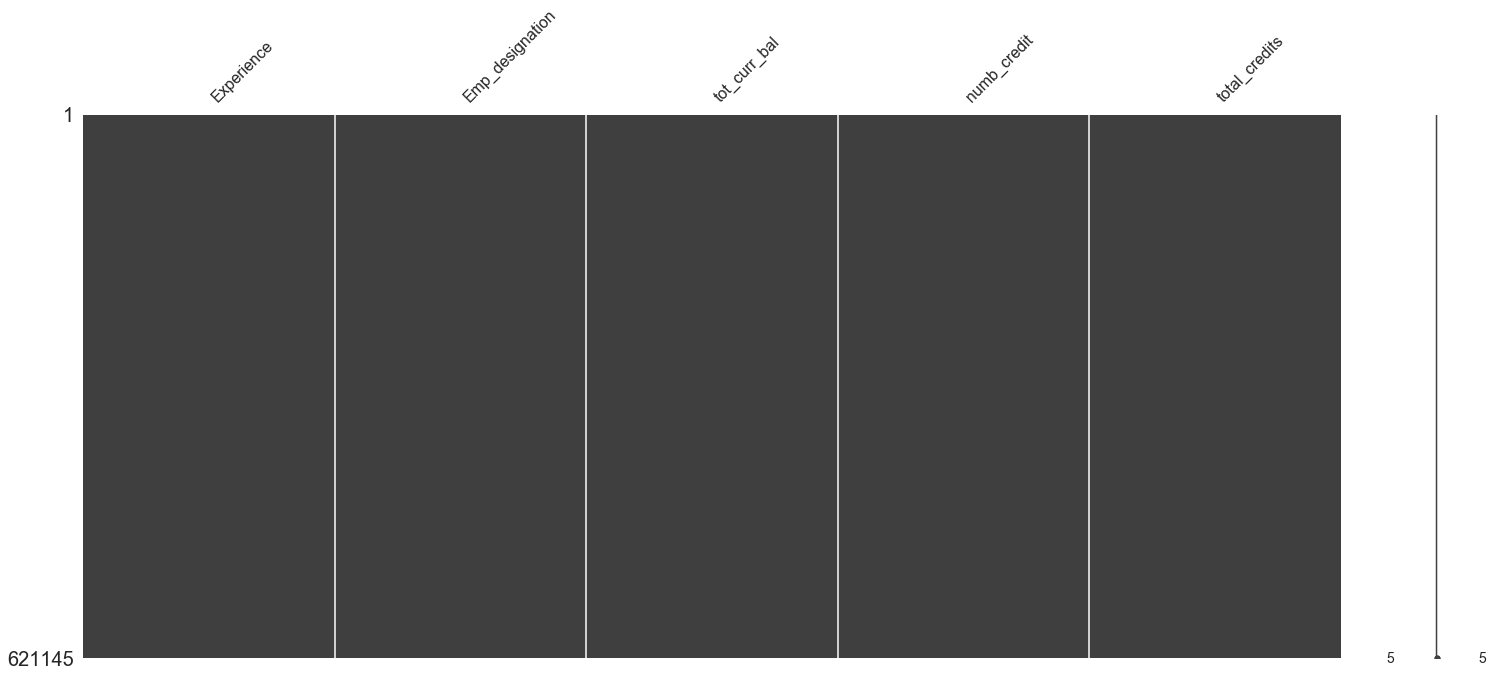

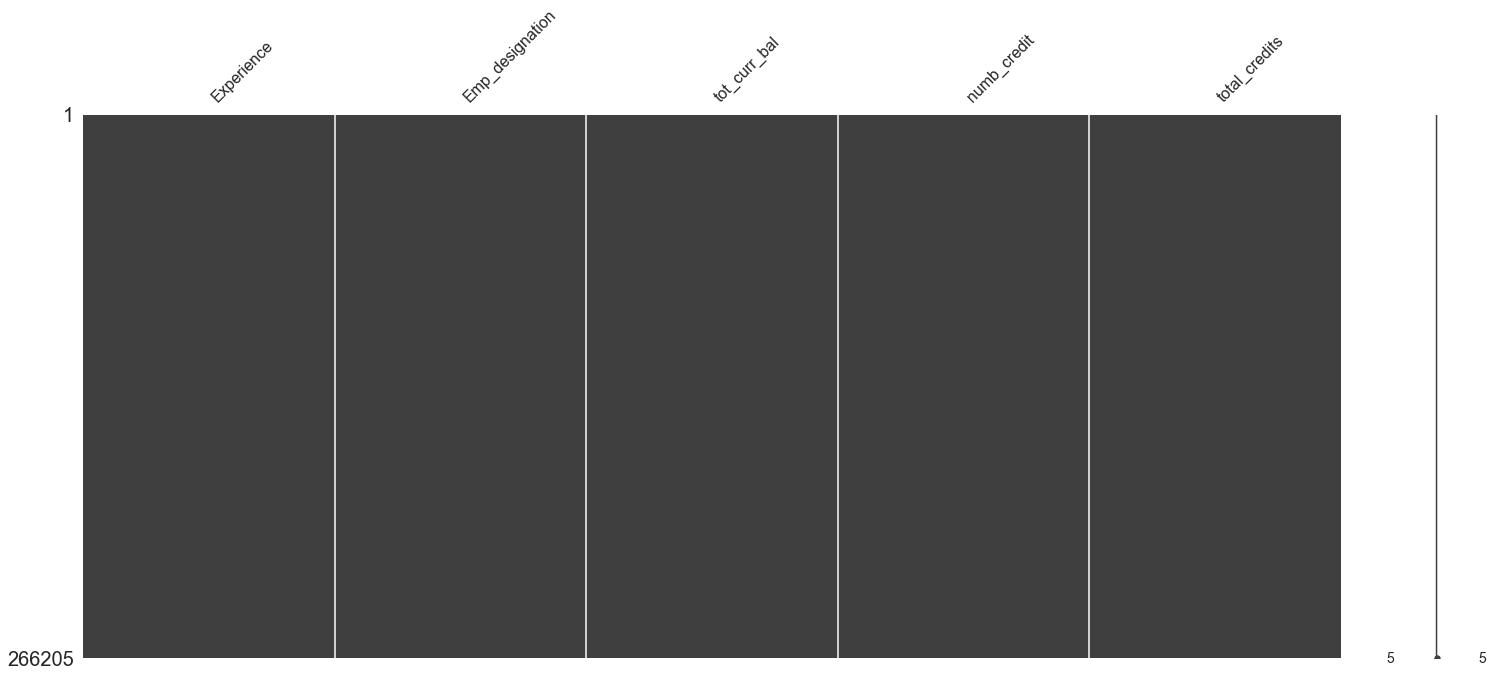

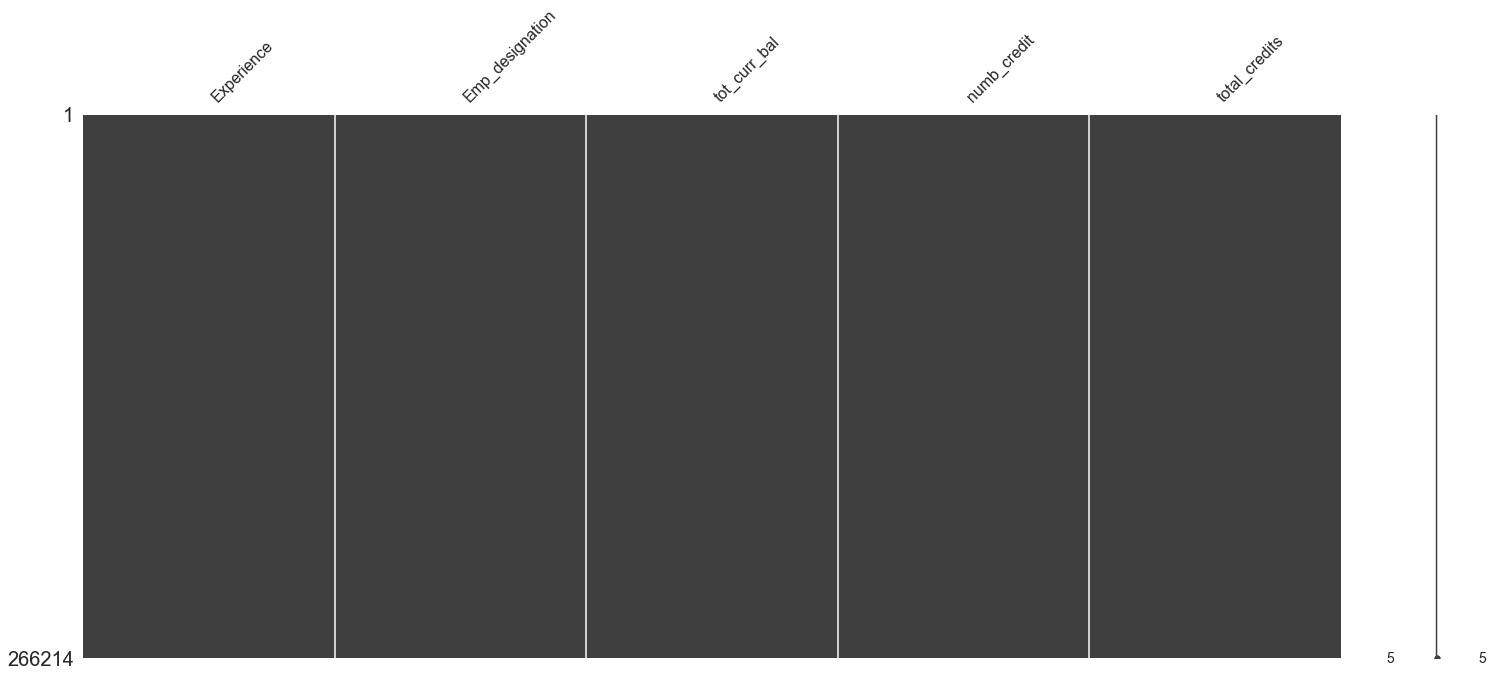

In [417]:
temp=['Experience','Emp_designation','tot_curr_bal','numb_credit','total_credits']
mno.matrix(XX_train[temp])
mno.matrix(XX_test[temp])
mno.matrix(df_test[temp])


In [418]:
for i in continuous_vars:
   XX_train=ImputeOutliers(XX_train,i)
   XX_test=ImputeOutliers(XX_test,i)
   df_test=ImputeOutliers(df_test,i)

'tot_curr_bal'

'Low - -213451.5'

'High - 441848.5'

'tot_curr_bal'

'Low - -212198.0'

'High - 439426.0'

'tot_curr_bal'

'Low - -213514.375'

'High - 441550.625'

'annual_inc'

'Low - -22500.0'

'High - 157500.0'

'annual_inc'

'Low - -22500.0'

'High - 157500.0'

'annual_inc'

'Low - -22500.0'

'High - 157500.0'

'debt_income_ratio'

'Low - -6.135000000000002'

'High - 41.985'

'debt_income_ratio'

'Low - -6.179999999999996'

'High - 42.059999999999995'

'debt_income_ratio'

'Low - -6.185000000000002'

'High - 42.015'

'numb_credit'

'Low - -1.0'

'High - 23.0'

'numb_credit'

'Low - -1.0'

'High - 23.0'

'numb_credit'

'Low - -1.0'

'High - 23.0'

'loan_amnt'

'Low - -10000.0'

'High - 38000.0'

'loan_amnt'

'Low - -10000.0'

'High - 38000.0'

'loan_amnt'

'Low - -10000.0'

'High - 38000.0'

'total_credits'

'Low - -5.5'

'High - 54.5'

'total_credits'

'Low - -5.5'

'High - 54.5'

'total_credits'

'Low - -5.5'

'High - 54.5'

'total_rec_int'

'Low - -2253.125'

'High - 4934.515'

'total_rec_int'

'Low - -2255.1600000000003'

'High - 4931.8'

'total_rec_int'

'Low - -2258.365000000001'

'High - 4944.315000000001'

'Rate_of_intrst'

'Low - 0.6750000000000025'

'High - 25.514999999999997'

'Rate_of_intrst'

'Low - 0.6750000000000025'

'High - 25.514999999999997'

'Rate_of_intrst'

'Low - 0.6750000000000025'

'High - 25.514999999999997'

In [419]:
out_temp=pd.DataFrame()
for i in continuous_vars:
    #Before
    x=outlier(XX_train,i)
    new_row = {'Feature':i,'Outliers Count':x[0], 'Non-outliers Count':x[1], 'Upper Whisker':x[2], 'Outlier Percentage':str(round((x[0]/len(XX_train))*100,2))+str("%")}
    #append row to the dataframe
    out_temp = out_temp.append(new_row, ignore_index=True)

print("Handling Outliers - After")
display(out_temp)




tot_curr_bal
Percentiles: 25th=32286.000, 75th=196111.000, IQR=163825.000
annual_inc
Percentiles: 25th=45000.000, 75th=90000.000, IQR=45000.000
debt_income_ratio
Percentiles: 25th=11.910, 75th=23.940, IQR=12.030
numb_credit
Percentiles: 25th=8.000, 75th=14.000, IQR=6.000
loan_amnt
Percentiles: 25th=8000.000, 75th=20000.000, IQR=12000.000
total_credits
Percentiles: 25th=17.000, 75th=32.000, IQR=15.000
total_rec_int
Percentiles: 25th=442.240, 75th=2239.150, IQR=1796.910
Rate_of_intrst
Percentiles: 25th=9.990, 75th=16.200, IQR=6.210
Handling Outliers - After


,Feature,Non-outliers Count,Outlier Percentage,Outliers Count,Upper Whisker
0,tot_curr_bal,621145.0,0.0%,0.0,441848.500
1,annual_inc,621145.0,0.0%,0.0,157500.000
2,debt_income_ratio,621145.0,0.0%,0.0,41.985
3,numb_credit,621145.0,0.0%,0.0,23.000
4,loan_amnt,621145.0,0.0%,0.0,38000.000
5,total_credits,621145.0,0.0%,0.0,54.500
6,total_rec_int,621145.0,0.0%,0.0,4934.515
7,Rate_of_intrst,621145.0,0.0%,0.0,25.515


In [420]:
out_temp=pd.DataFrame()
for i in continuous_vars:
    #Before
    x=outlier(XX_test,i)
    new_row = {'Feature':i,'Outliers Count':x[0], 'Non-outliers Count':x[1], 'Upper Whisker':x[2], 'Outlier Percentage':str(round((x[0]/len(XX_test))*100,2))+str("%")}
    #append row to the dataframe
    out_temp = out_temp.append(new_row, ignore_index=True)

print("Handling Outliers - After")
display(out_temp)

tot_curr_bal
Percentiles: 25th=32161.000, 75th=195067.000, IQR=162906.000
annual_inc
Percentiles: 25th=45000.000, 75th=90000.000, IQR=45000.000
debt_income_ratio
Percentiles: 25th=11.910, 75th=23.970, IQR=12.060
numb_credit
Percentiles: 25th=8.000, 75th=14.000, IQR=6.000
loan_amnt
Percentiles: 25th=8000.000, 75th=20000.000, IQR=12000.000
total_credits
Percentiles: 25th=17.000, 75th=32.000, IQR=15.000
total_rec_int
Percentiles: 25th=439.950, 75th=2236.690, IQR=1796.740
Rate_of_intrst
Percentiles: 25th=9.990, 75th=16.200, IQR=6.210
Handling Outliers - After


,Feature,Non-outliers Count,Outlier Percentage,Outliers Count,Upper Whisker
0,tot_curr_bal,266205.0,0.0%,0.0,439426.000
1,annual_inc,266205.0,0.0%,0.0,157500.000
2,debt_income_ratio,266205.0,0.0%,0.0,42.060
3,numb_credit,266205.0,0.0%,0.0,23.000
4,loan_amnt,266205.0,0.0%,0.0,38000.000
5,total_credits,266205.0,0.0%,0.0,54.500
6,total_rec_int,266205.0,0.0%,0.0,4931.800
7,Rate_of_intrst,266205.0,0.0%,0.0,25.515


In [421]:
out_temp=pd.DataFrame()
for i in continuous_vars:
    #Before
    x=outlier(df_test,i)
    new_row = {'Feature':i,'Outliers Count':x[0], 'Non-outliers Count':x[1], 'Upper Whisker':x[2], 'Outlier Percentage':str(round((x[0]/len(df_test))*100,2))+str("%")}
    #append row to the dataframe
    out_temp = out_temp.append(new_row, ignore_index=True)

print("Handling Outliers - After")
display(out_temp)

tot_curr_bal
Percentiles: 25th=32135.000, 75th=195901.250, IQR=163766.250
annual_inc
Percentiles: 25th=45000.000, 75th=90000.000, IQR=45000.000
debt_income_ratio
Percentiles: 25th=11.890, 75th=23.940, IQR=12.050
numb_credit
Percentiles: 25th=8.000, 75th=14.000, IQR=6.000
loan_amnt
Percentiles: 25th=8000.000, 75th=20000.000, IQR=12000.000
total_credits
Percentiles: 25th=17.000, 75th=32.000, IQR=15.000
total_rec_int
Percentiles: 25th=442.640, 75th=2243.310, IQR=1800.670
Rate_of_intrst
Percentiles: 25th=9.990, 75th=16.200, IQR=6.210
Handling Outliers - After


,Feature,Non-outliers Count,Outlier Percentage,Outliers Count,Upper Whisker
0,tot_curr_bal,266214.0,0.0%,0.0,441550.625
1,annual_inc,266214.0,0.0%,0.0,157500.000
2,debt_income_ratio,266214.0,0.0%,0.0,42.015
3,numb_credit,266214.0,0.0%,0.0,23.000
4,loan_amnt,266214.0,0.0%,0.0,38000.000
5,total_credits,266214.0,0.0%,0.0,54.500
6,total_rec_int,266214.0,0.0%,0.0,4944.315
7,Rate_of_intrst,266214.0,0.0%,0.0,25.515


In [422]:
def correlation(dataset,threshold):
    col_corr=set() #Set off all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname=corr_matrix.columns[i] #Getting the name of Column
                col_corr.add(colname)
    return col_corr           
                

In [423]:
home_ownership=pd.get_dummies(XX_train['home_ownership'],drop_first=False)
display(home_ownership.head())

home_ownership1=pd.get_dummies(XX_test['home_ownership'],drop_first=False)
display(home_ownership1.head())

home_ownership2=pd.get_dummies(df_test['home_ownership'],drop_first=False)
display(home_ownership2.head())

,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
436739,0,0,0,0,0,1
356437,0,1,0,0,0,0
387152,0,0,0,0,1,0
418953,0,1,0,0,0,0
410779,0,0,0,0,0,1


,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
869328,0,1,0,0,0,0
91448,0,1,0,0,0,0
192522,0,0,0,0,0,1
882298,0,0,0,0,0,1
300258,0,0,0,0,0,1


,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0


In [424]:
verification_status=pd.get_dummies(XX_train['verification_status'],drop_first=False)
display(verification_status.head())

verification_status1=pd.get_dummies(XX_test['verification_status'],drop_first=False)
display(verification_status1.head())

verification_status2=pd.get_dummies(df_test['verification_status'],drop_first=False)
display(verification_status2.head())

,Not Verified,Source Verified,Verified
436739,1,0,0
356437,1,0,0
387152,1,0,0
418953,0,1,0
410779,0,0,1


,Not Verified,Source Verified,Verified
869328,0,0,1
91448,1,0,0
192522,0,1,0
882298,0,0,1
300258,1,0,0


,Not Verified,Source Verified,Verified
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [425]:
initial_list_status=pd.get_dummies(XX_train['initial_list_status'],drop_first=False)
display(initial_list_status.head())

initial_list_status1=pd.get_dummies(XX_test['initial_list_status'],drop_first=False)
display(initial_list_status1.head())

initial_list_status2=pd.get_dummies(df_test['initial_list_status'],drop_first=False)
display(initial_list_status2.head())

,f,w
436739,0,1
356437,0,1
387152,1,0
418953,0,1
410779,1,0


,f,w
869328,1,0
91448,1,0
192522,0,1
882298,0,1
300258,0,1


,f,w
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [426]:
Experience=pd.get_dummies(XX_train['Experience'],drop_first=False)
display(Experience.head())

Experience1=pd.get_dummies(XX_test['Experience'],drop_first=False)
display(Experience1.head())

Experience2=pd.get_dummies(df_test['Experience'],drop_first=False)
display(Experience2.head())

,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
436739,0,0,0,1,0,0,0,0,0,0,0
356437,0,0,0,1,0,0,0,0,0,0,0
387152,0,0,0,0,0,0,0,0,0,1,0
418953,0,1,0,0,0,0,0,0,0,0,0
410779,0,1,0,0,0,0,0,0,0,0,0


,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
869328,0,0,0,0,0,0,0,0,1,0,0
91448,0,1,0,0,0,0,0,0,0,0,0
192522,0,0,0,0,0,0,0,0,1,0,0
882298,0,1,0,0,0,0,0,0,0,0,0
300258,0,1,0,0,0,0,0,0,0,0,0


,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [427]:
purpose=pd.get_dummies(XX_train['purpose'],drop_first=False)
display(purpose.head())

purpose1=pd.get_dummies(XX_test['purpose'],drop_first=False)
display(purpose1.head())

purpose2=pd.get_dummies(df_test['purpose'],drop_first=False)
display(purpose2.head())

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
436739,0,0,1,0,0,0,0,0,0,0,0,0,0,0
356437,0,0,0,0,0,0,0,1,0,0,0,0,0,0
387152,0,0,0,0,0,0,1,0,0,0,0,0,0,0
418953,0,0,1,0,0,0,0,0,0,0,0,0,0,0
410779,0,0,1,0,0,0,0,0,0,0,0,0,0,0


,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
869328,0,0,0,0,1,0,0,0,0,0,0,0,0,0
91448,0,0,1,0,0,0,0,0,0,0,0,0,0,0
192522,0,1,0,0,0,0,0,0,0,0,0,0,0,0
882298,0,0,1,0,0,0,0,0,0,0,0,0,0,0
300258,0,1,0,0,0,0,0,0,0,0,0,0,0,0


,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [428]:
#Drop Categorical Features
XX_train=XX_train.drop(['home_ownership','verification_status','initial_list_status','Experience','purpose'],axis=1)
XX_train.head()

XX_test=XX_test.drop(['home_ownership','verification_status','initial_list_status','Experience','purpose'],axis=1)
XX_test.head()

df_test=df_test.drop(['home_ownership','verification_status','initial_list_status','Experience','purpose'],axis=1)
df_test.head()

,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,Emp_designation,total_rec_int,Rate_of_intrst
0,368784.0,110000.0,15.51,16.0,21000,29.0,Account Manager,500.23,9.99
1,80625.0,86000.0,14.04,14.0,10800,36.0,NJ Charter Schools Assoc.,932.37,14.09
2,428523.0,82000.0,31.90,7.0,17450,20.0,Sr Trade Marketing Manager,196.52,14.48
3,47212.0,46000.0,30.01,9.0,15450,15.0,technician,3253.31,14.98
4,24026.0,65000.0,3.80,8.0,3500,17.0,asst. manager,285.05,9.49


In [429]:
XX_train=pd.concat([XX_train,home_ownership,verification_status,initial_list_status,Experience,purpose],axis=1)
display(XX_train.head())

XX_test=pd.concat([XX_test,home_ownership1,verification_status1,initial_list_status1,Experience1,purpose1],axis=1)
display(XX_test.head())

df_test=pd.concat([df_test,home_ownership2,verification_status2,initial_list_status2,Experience2,purpose2],axis=1)
display(df_test.head())

,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,Emp_designation,total_rec_int,Rate_of_intrst,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,f,w,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
436739,269651.0,65000.0,16.10,9.0,10000,23.0,rick hendrick chevrolet,748.54,12.12,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
356437,441848.5,85000.0,16.43,13.0,2400,35.0,Account Executive,508.57,17.57,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
387152,35803.0,62000.0,25.78,6.0,9000,14.0,Warehouse Supervisor,1008.94,9.17,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
418953,441848.5,53997.0,15.69,14.0,9600,30.0,Personnel Assistant,218.77,9.99,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
410779,55355.0,60000.0,28.92,15.0,20000,17.0,Supervisor,1538.96,12.69,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,Emp_designation,total_rec_int,Rate_of_intrst,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,f,w,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
869328,80103.0,32500.0,28.58,9.0,2500,26.0,The Salvation Army,277.87,6.99,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
91448,26133.0,55000.0,16.74,5.0,10000,9.0,Dominos pizza Dist.Hawaii,3264.21,19.72,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
192522,96688.0,90000.0,14.28,19.0,10000,32.0,FMC Technologies,1769.15,11.55,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
882298,59985.0,84000.0,20.79,7.0,24000,18.0,usa jetiing drain pros,4931.80,13.11,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
300258,39765.0,29000.0,16.51,12.0,7800,22.0,Claims analyst,177.62,5.32,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,Emp_designation,total_rec_int,Rate_of_intrst,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,f,w,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,368784.0,110000.0,15.51,16.0,21000,29.0,Account Manager,500.23,9.99,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,80625.0,86000.0,14.04,14.0,10800,36.0,NJ Charter Schools Assoc.,932.37,14.09,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,428523.0,82000.0,31.90,7.0,17450,20.0,Sr Trade Marketing Manager,196.52,14.48,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,47212.0,46000.0,30.01,9.0,15450,15.0,technician,3253.31,14.98,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,24026.0,65000.0,3.80,8.0,3500,17.0,asst. manager,285.05,9.49,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [430]:
XX_train.columns

Index(['tot_curr_bal', 'annual_inc', 'debt_income_ratio', 'numb_credit',
       'loan_amnt', 'total_credits', 'Emp_designation', 'total_rec_int',
       'Rate_of_intrst', 'ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT',
       'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '1 year',
       '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years',
       '7 years', '8 years', '9 years', '< 1 year', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [431]:
XX_test.columns

Index(['tot_curr_bal', 'annual_inc', 'debt_income_ratio', 'numb_credit',
       'loan_amnt', 'total_credits', 'Emp_designation', 'total_rec_int',
       'Rate_of_intrst', 'ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT',
       'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '1 year',
       '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years',
       '7 years', '8 years', '9 years', '< 1 year', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [432]:
df_test.columns

Index(['tot_curr_bal', 'annual_inc', 'debt_income_ratio', 'numb_credit',
       'loan_amnt', 'total_credits', 'Emp_designation', 'total_rec_int',
       'Rate_of_intrst', 'ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT',
       'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '1 year',
       '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years',
       '7 years', '8 years', '9 years', '< 1 year', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [433]:
display(XX_train.isnull().sum().sum())
display(XX_test.isnull().sum().sum())
display(df_test.isnull().sum().sum())

0

0

0

In [434]:
XX_train = XX_train.rename(columns = {'< 1 year': 'Lessthan1Year'})
XX_train = XX_train.rename(columns = {'10+ years': '10PlusYears'})
display(XX_train.describe())

XX_test = XX_test.rename(columns = {'< 1 year': 'Lessthan1Year'})
XX_test = XX_test.rename(columns = {'10+ years': '10PlusYears'})
display(XX_test.describe())

df_test = df_test.rename(columns = {'< 1 year': 'Lessthan1Year'})
df_test = df_test.rename(columns = {'10+ years': '10PlusYears'})
display(df_test.describe())

,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,f,w,1 year,10PlusYears,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,Lessthan1Year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
count,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.00000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000,621145.000000
mean,128458.897628,71544.525287,18.128456,11.403901,14755.790999,25.123067,1562.187657,13.240516,0.000003,0.50063,0.000050,0.000208,0.098616,0.400493,0.300869,0.370804,0.328328,0.514872,0.485128,0.064516,0.378854,0.088833,0.078780,0.059094,0.062895,0.048618,0.050296,0.049562,0.038865,0.079687,0.010059,0.232675,0.590366,0.000451,0.058614,0.004131,0.019588,0.009589,0.006103,0.048122,0.000644,0.011669,0.005369,0.002619
std,122103.356211,34660.669700,8.299249,4.839543,8434.235918,11.342297,1442.251827,4.369076,0.001794,0.50000,0.007064,0.014410,0.298146,0.489999,0.458636,0.483020,0.469605,0.499779,0.499779,0.245671,0.485102,0.284502,0.269396,0.235801,0.242774,0.215069,0.218555,0.217038,0.193274,0.270808,0.099788,0.422537,0.491767,0.021227,0.234902,0.064141,0.138580,0.097452,0.077885,0.214025,0.025368,0.107390,0.073077,0.051113
min,0.000000,0.000000,0.000000,0.000000,500.000000,1.000000,0.000000,5.320000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32286.000000,45000.000000,11.910000,8.000000,8000.000000,17.000000,442.240000,9.990000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80757.500000,65000.000000,17.660000,11.000000,13000.000000,24.000000,1074.760000,12.990000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,196111.000000,90000.000000,23.940000,14.000000,20000.000000,32.000000,2239.150000,16.200000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,441848.500000,157500.000000,41.985000,23.000000,35000.000000,54.500000,4934.515000,25.515000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,f,w,1 year,10PlusYears,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,Lessthan1Year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
count,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000,266205.000000
mean,127672.852854,71505.779470,18.137450,11.383486,14755.218535,25.089857,1557.663078,13.246791,0.000004,0.498060,0.000056,0.000199,0.098473,0.403208,0.299912,0.372777,0.327312,0.514675,0.485325,0.063928,0.379662,0.088995,0.079225,0.059439,0.062497,0.047895,0.050161,0.049473,0.039500,0.079225,0.009823,0.231615,0.591691,0.000537,0.057929,0.004286,0.019196,0.009707,0.006097,0.048741,0.000657,0.011754,0.005263,0.002705
std,121530.855153,34657.984532,8.309233,4.838786,8437.980447,11.345617,1439.141024,4.367294,0.001938,0.499997,0.007506,0.014109,0.297954,0.490543,0.458220,0.483544,0.469233,0.499786,0.499786,0.244625,0.485304,0.284738,0.270090,0.236445,0.242056,0.213545,0.218277,0.216854,0.194781,0.270090,0.098625,0.421865,0.491522,0.023171,0.233610,0.065329,0.137213,0.098044,0.077844,0.215326,0.025631,0.107777,0.072355,0.051936
min,0.000000,1200.000000,0.000000,1.000000,500.000000,1.000000,0.000000,5.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32161.000000,45000.000000,11.910000,8.000000,8000.000000,17.000000,439.950000,9.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80103.000000,65000.000000,17.650000,11.000000,13000.000000,24.000000,1070.980000,12.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195067.000000,90000.000000,23.970000,14.000000,20000.000000,32.000000,2236.690000,16.200000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,439426.000000,157500.000000,42.060000,23.000000,35000.000000,54.500000,4931.800000,25.515000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,f,w,1 year,10PlusYears,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,Lessthan1Year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
count,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000,266214.000000
mean,128208.197137,71496.704072,18.120090,11.391369,14767.282337,25.098430,1564.126327,13.251223,0.000004,0.500349,0.000053,0.000199,0.098098,0.401297,0.301306,0.370927,0.327766,0.515987,0.484013,0.063727,0.379976,0.088305,0.079042,0.059610,0.062803,0.048330,0.050305,0.049795,0.038717,0.079391,0.009804,0.233316,0.589421,0.000439,0.058618,0.004320,0.019582,0.009590,0.006029,0.048765,0.000586,0.011712,0.005150,0.002667
std,122030.503398,34681.748792,8.303508,4.839434,8447.119235,11.338698,1444.048253,4.365973,0.001938,0.500001,0.007252,0.014108,0.297447,0.490162,0.458826,0.483054,0.469400,0.499745,0.499745,0.244266,0.485381,0.283738,0.269804,0.236763,0.242608,0.214462,0.218575,0.217521,0.192920,0.270349,0.098529,0.422942,0.491940,0.020960,0.234909,0.065583,0.138559,0.097458,0.077412,0.215377,0.024200,0.107588,0.071579,0.051574
min,0.000000,0.000000,0.000000,0.000000,500.000000,1.000000,0.000000,5.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32135.000000,45000.000000,11.890000,8.000000,8000.000000,17.000000,442.640000,9.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80625.000000,64700.000000,17.670000,11.000000,13000.000000,24.000000,1076.090000,12.990000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195901.250000,90000.000000,23.940000,14.000000,20000.000000,32.000000,2243.310000,16.200000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,441550.625000,157500.000000,42.015000,23.000000,35000.000000,54.500000,4944.315000,25.515000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [435]:
#XX_test['ANY']=0
XX_test=XX_test[['tot_curr_bal', 'annual_inc', 'debt_income_ratio', 'numb_credit', 'loan_amnt', 'total_credits', 'total_rec_int', 'Rate_of_intrst', 'ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '1 year', '10PlusYears', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', 'Lessthan1Year', 'car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']]
XX_test

df_test=df_test[['tot_curr_bal', 'annual_inc', 'debt_income_ratio', 'numb_credit', 'loan_amnt', 'total_credits', 'total_rec_int', 'Rate_of_intrst', 'ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '1 year', '10PlusYears', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', 'Lessthan1Year', 'car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']]
df_test

,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,f,w,1 year,10PlusYears,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,Lessthan1Year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,368784.0,110000.0,15.51,16.0,21000,29.0,500.23,9.99,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,80625.0,86000.0,14.04,14.0,10800,36.0,932.37,14.09,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,428523.0,82000.0,31.90,7.0,17450,20.0,196.52,14.48,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,47212.0,46000.0,30.01,9.0,15450,15.0,3253.31,14.98,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,24026.0,65000.0,3.80,8.0,3500,17.0,285.05,9.49,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266209,80625.0,70000.0,11.91,7.0,8000,29.0,576.62,15.28,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
266210,248733.0,43000.0,11.28,5.0,15000,27.0,253.19,10.99,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
266211,165488.0,67000.0,14.28,8.0,26800,28.0,2409.29,13.33,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
266212,156518.0,60000.0,23.64,9.0,20000,24.0,1746.56,6.62,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [436]:
XX_train=XX_train.drop(columns='Emp_designation',axis=1)
XX_train

,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,f,w,1 year,10PlusYears,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,Lessthan1Year,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
436739,269651.0,65000.0,16.10,9.0,10000,23.0,748.540,12.12,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
356437,441848.5,85000.0,16.43,13.0,2400,35.0,508.570,17.57,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
387152,35803.0,62000.0,25.78,6.0,9000,14.0,1008.940,9.17,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
418953,441848.5,53997.0,15.69,14.0,9600,30.0,218.770,9.99,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
410779,55355.0,60000.0,28.92,15.0,20000,17.0,1538.960,12.69,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196411,80757.5,48000.0,18.90,9.0,12200,21.0,1234.500,6.62,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
539183,265280.0,62000.0,19.42,18.0,15000,31.0,434.540,6.68,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
560984,368115.0,92000.0,15.18,11.0,13000,48.0,0.000,6.24,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
380609,51319.0,33182.0,29.04,12.0,13200,20.0,2088.960,13.98,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [437]:
import xgboost as xgb

In [438]:
from sklearn.metrics import mean_squared_error

In [439]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [440]:
xg_reg.fit(XX_train,yy_train)

preds = xg_reg.predict(XX_test)

[14:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [441]:
preds

array([10157.049,  8590.289,  9341.374, ...,  6931.673, 11905.016,
       13875.17 ], dtype=float32)

In [442]:
rmse = np.sqrt(mean_squared_error(yy_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 21242.047784


In [453]:
params={
    'learning_rate'   : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth'       : [3,4,5,6,8,10,12,15],
    'subsample'       : [0.1,0.3,0.5,1],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'n_estimators'    : [5,10,20],
    'objective'       : ['reg:linear'],
    'gamma'           : [0.0,0.1,0.2,0.3,0.4],
    'alpha'           : [1,5,10,15],
    'lambda'          : [1,5,10],
    'min_child_weight' :[1,3,5,7]
}


In [444]:
params={
    'learning_rate'   : [0.05,0.10,0.15,0.20,0.25,0.30,0.5,0.6,0.7],
    'max_depth'       : [3,4,5,6,8,10,12,15],
    'subsample'       : [0.1,0.3,0.5,0.7,0.9,1],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'gamma'           : [0.0,0.1,0.2,0.3,0.4],
    'min_child_weight' :[1,3,5,7]
}

In [454]:
xgb_regressor=xgb.XGBRegressor()

In [455]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [456]:
ran_search=RandomizedSearchCV(xgb_regressor,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [457]:
ran_search.fit(XX_train,yy_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.0min finished


[14:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma'

In [458]:
ran_search.best_params_

{'subsample': 0.3,
 'objective': 'reg:linear',
 'n_estimators': 10,
 'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.25,
 'lambda': 10,
 'gamma': 0.3,
 'colsample_bytree': 0.3,
 'alpha': 15}

In [461]:
ran_search.best_estimator_

XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lambda=10,
             learning_rate=0.25, max_delta_step=0, max_depth=15,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=15,
             reg_lambda=10, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [531]:
#On 600000 Data
regressor = xgb.XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=15,
             reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [448]:
#On 400000 Data
regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [532]:
regressor
regressor.fit(XX_train,yy_train)

XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=15,
             reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [533]:
preds = regressor.predict(XX_test)

In [534]:
rmse = np.sqrt(mean_squared_error(yy_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 18243.321846
